NAMA: Talita Iza Nurazmi
EMAIL: talitazmiza@gmail.com

In [ ]:
#Mengenali bentuk tangan(gunting, batu, kertas) menggunakan program jaringan saraf tiruan dengan TensorFlow

# import packages yang dibutuhkan 
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

In [ ]:
# download file dalam bentuk zip
gambar_dir = os.path.join('/', 'gambar')
os.mkdir(gambar_dir)
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /gambar/rockpaperscissors.zip

--2020-10-27 05:44:28--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/gambar/rockpaperscissors.zip’

/gambar/rockpapersc 100%[===================>] 307.92M  4.01MB/s    in 1m 50s  

2020-10-27 05:46:20 (2.79 MB/s) - ‘/gambar/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# ekstraksi pada file zip
import zipfile
local_zip = '/gambar/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/gambar')
zip_ref.close()

In [ ]:
# melihat isi data 
os.listdir('/gambar/rockpaperscissors')

['paper', 'scissors', 'README_rpc-cv-images.txt', 'rock', 'rps-cv-images']

In [ ]:
# mengecek jumlah image didalam directory rock
len(os.listdir('/gambar/rockpaperscissors/rock'))

726

In [ ]:
# mengecek jumlah image didalam directory scissors
len(os.listdir('/gambar/rockpaperscissors/scissors'))

750

In [ ]:
# mengecek jumlah image didalam directory paper
len(os.listdir('/gambar/rockpaperscissors/paper'))

712

In [ ]:
import shutil
base_dir = '/gambar/rockpaperscissors/'
rock_dir = os.path.join(base_dir, 'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
rock_train = os.path.join(train_dir, 'rock')
paper_train = os.path.join(train_dir, 'paper')
scissors_train = os.path.join(train_dir, 'scissors')
rock_val = os.path.join(val_dir, 'rock')
paper_val = os.path.join(val_dir, 'paper')
scissors_val= os.path.join(val_dir, 'scissors')
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(rock_train)
os.mkdir(paper_train)
os.mkdir(scissors_train)
os.mkdir(rock_val)
os.mkdir(paper_val)
os.mkdir(scissors_val)

os.listdir(base_dir)

['val',
 'paper',
 'scissors',
 'README_rpc-cv-images.txt',
 'train',
 'rock',
 'rps-cv-images']

In [ ]:
from sklearn.model_selection import train_test_split
import shutil
# memecah directory rock menjadi data train dan data validation
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# memecah directory paper menjadi data train dan data validation
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# memecah directory scissors menjadi data train dan data validation
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [ ]:
# membuat directory untuk masing-masing data train dan validation
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(val_dir, 'rock')
val_paper = os.path.join(val_dir, 'paper')
val_scissors = os.path.join(val_dir, 'scissors')

# membuat directory baru di dalam directory train dan val
if not os.path.exists(train_rock):
  os.mkdir(train_rock)
if not os.path.exists(train_paper):
  os.mkdir(train_paper)
if not os.path.exists(train_scissors):
  os.mkdir(train_scissors)

if not os.path.exists(val_rock):
  os.mkdir(val_rock)
if not os.path.exists(val_paper):
  os.mkdir(val_paper)
if not os.path.exists(val_scissors):
  os.mkdir(val_scissors)

In [ ]:
# meng copy data train dan data val ke directory baru yang telah dibuat sebelumnya
import shutil

for i in train_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(train_rock, i))
for i in train_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(train_paper,i))
for i in train_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(train_scissors,i))

for i in val_rock_dir:
  shutil.copy(os.path.join(rock_dir, i), os.path.join(val_rock,i))
for i in val_paper_dir:
  shutil.copy(os.path.join(paper_dir,i), os.path.join(val_paper,i))
for i in val_scissors_dir:
  shutil.copy(os.path.join(scissors_dir,i), os.path.join(val_scissors,i))

In [ ]:
# mengecek jumlah image didalam directory train (rock)
len(os.listdir('/gambar/rockpaperscissors/train/rock'))

435

In [ ]:
# mengecek jumlah image didalam directory val (rock)
len(os.listdir('/gambar/rockpaperscissors/val/rock'))

291

In [ ]:
# mengecek jumlah image didalam directory train (scissors)
len(os.listdir('/gambar/rockpaperscissors/train/scissors'))

450

In [ ]:
# mengecek jumlah image didalam directory val (scissors)
len(os.listdir('/gambar/rockpaperscissors/val/scissors'))

300

In [ ]:
# mengecek jumlah image didalam directory train (paper)
len(os.listdir('/gambar/rockpaperscissors/train/paper'))

427

In [ ]:
# mengecek jumlah image didalam directory val (paper)
len(os.listdir('/gambar/rockpaperscissors/val/paper'))

285

In [ ]:
# buat image data generator
# image data generator untuk preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar

train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    zoom_range=0.2)

test_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'nearest',
    zoom_range=0.2)

In [ ]:
# menggunakan objek image data generator sebelumnya untuk mempersiapkan data latih yang akan dipelajari oleh model
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size =(75,75),  # mengubah resolusi seluruh gambar menjadi 75x75 pixel
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical' # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (75,75), # mengubah resolusi seluruh gambar menjadi 75x75 pixel
    batch_size = 32,
    shuffle=True,
    class_mode = 'categorical' # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# membuat model 
# membangun arsitektur sebuah CNN. 
# Sebuah CNN pada keras mirip dengan MLP untuk klasifikasi fashion MNIST yang kita bahas sebelumnya. 
# layer konvolusi adalah untuk mengekstraksi atribut pada gambar.
# layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses pelatihan MLP lebih cepat.

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (75,75,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
from timeit import default_timer as timer

class TimingCallback(tf.keras.callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan eposchs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      callbacks=[cb],
      verbose=2)


Epoch 1/20
25/25 - 12s - loss: 1.0136 - accuracy: 0.4512 - val_loss: 0.7529 - val_accuracy: 0.7250
Epoch 2/20
25/25 - 11s - loss: 0.5110 - accuracy: 0.8075 - val_loss: 0.3344 - val_accuracy: 0.8750
Epoch 3/20
25/25 - 11s - loss: 0.3499 - accuracy: 0.8600 - val_loss: 0.3066 - val_accuracy: 0.9000
Epoch 4/20
25/25 - 12s - loss: 0.2647 - accuracy: 0.9050 - val_loss: 0.3124 - val_accuracy: 0.9062
Epoch 5/20
25/25 - 12s - loss: 0.2456 - accuracy: 0.9112 - val_loss: 0.2126 - val_accuracy: 0.9438
Epoch 6/20
25/25 - 12s - loss: 0.2283 - accuracy: 0.9237 - val_loss: 0.1565 - val_accuracy: 0.9375
Epoch 7/20
25/25 - 12s - loss: 0.1998 - accuracy: 0.9350 - val_loss: 0.1455 - val_accuracy: 0.9625
Epoch 8/20
25/25 - 13s - loss: 0.1883 - accuracy: 0.9388 - val_loss: 0.1406 - val_accuracy: 0.9625
Epoch 9/20
25/25 - 12s - loss: 0.1731 - accuracy: 0.9413 - val_loss: 0.0909 - val_accuracy: 0.9750
Epoch 10/20
25/25 - 12s - loss: 0.1762 - accuracy: 0.9400 - val_loss: 0.1665 - val_accuracy: 0.9375
Epoch 11/

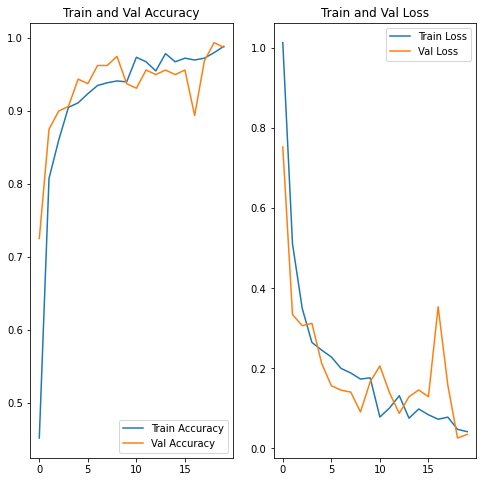

In [ ]:
# visualisasi hasil data training (Plot accuracy & loss model)

import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
 

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Train and Val Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()

Saving kertas.jpg to kertas (1).jpg
kertas.jpg
paper


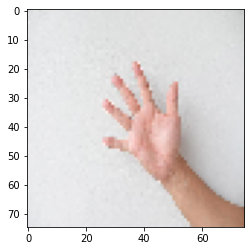

In [ ]:
# membuat sebuah input image untuk classifier image yang kita inputkan itu rock, paper atau scissors.
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(75,75))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')